# MY FIRST NEURAL NETS WITH TENSOPFLOW

### Just kidding

Using TensorFlow backend.


(50000, 28, 28) (50000,)


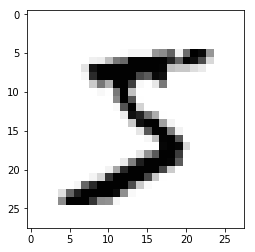

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

## Check the shape of inputs and outputs

In [2]:
print("Training input shape", X_train.shape)
print("Validation input shape", X_val.shape)
print("Testing input shape", X_test.shape)
print("Training output shape", y_train.shape)
print("Validation output shape", y_val.shape)
print("Testing output shape", y_test.shape)

Training input shape (50000, 28, 28)
Validation input shape (10000, 28, 28)
Testing input shape (10000, 28, 28)
Training output shape (50000,)
Validation output shape (10000,)
Testing output shape (10000,)


In [3]:
# Reshape the inputs of 28 * 28 into single 784 vectors
X_train = X_train.reshape([50000, 784])
X_val = X_val.reshape([10000, 784])
X_test = X_test.reshape([10000, 784])

## Importing Tensorflow and Numpy

In [4]:
import tensorflow as tf
import numpy as np

## Create the Placeholder for the training the data

In [5]:
# Input and outputs
X = tf.placeholder(tf.float32, shape = (None, 784))
y = tf.placeholder(tf.float32, shape = (None, 10))

# Storing the probablities at the output layer
keep_prob = tf.placeholder(tf.float32)

## Initialize the weights and bias parameters

In [6]:
# Weights and bias intialization for the MNIST data objects
# Shape of the tensors is choosen by computing from the digits 
# pixel values. Variable are given for easy identification of those 
# while we perform the computation of the Neural Network graph
W1 = tf.get_variable("W1",  [784, 128], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [128], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2",  [128, 128], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [128], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [128, 10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [10], initializer = tf.zeros_initializer())

## Performing the Forward pass

In [7]:
Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)

## Initialize the Adam Optimizer

In [8]:
# Compute the cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = A3))

# Learning rate computation
starter_learning_rate = 0.001
global_step = tf.Variable(0, trainable = False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase = True)

# Optimizer calculation
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Reshape the labels for one hot encoding

In [9]:
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

## Model training

In [12]:
# Set the init and batch size for training
init = tf.global_variables_initializer()
batch_size = 3000

# Create the tensorflow session
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    val_costs = []
    # Looping in for 100 epochs
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i + batch_size], y:y_train[i:i + batch_size],
                                           keep_prob:0.65})
        train_costs.append(sess.run(cost, feed_dict = {X : X_train, y : y_train, keep_prob : 1}))
        val_costs.append(sess.run(cost, feed_dict = {X : X_val, y : y_val, keep_prob : 1}))
        if epoch % 10 == 9:
            print("Epoch " + str(epoch + 1))
            print("Train cost " + str(train_costs[-1]))
            print("Validation cost " + str(val_costs[-1]))
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X : X_train, y : y_train, keep_prob : 1})
    val_accuracy = accuracy.eval({X : X_val, y : y_val, keep_prob : 1})
    test_accuracy = accuracy.eval({X : X_test, y : y_test, keep_prob : 1})
    print("")
    print("Train Set Accuracy:", train_accuracy)
    print("Validation Set Accuracy:", val_accuracy)
    print("Test Set Accuracy:", test_accuracy)

Epoch 10
Train cost 1.5288
Validation cost 1.52285
Epoch 20
Train cost 1.50471
Validation cost 1.50356
Epoch 30
Train cost 1.49335
Validation cost 1.49539
Epoch 40
Train cost 1.48617
Validation cost 1.49036
Epoch 50
Train cost 1.4816
Validation cost 1.48742
Epoch 60
Train cost 1.47844
Validation cost 1.4854
Epoch 70
Train cost 1.47581
Validation cost 1.48417
Epoch 80
Train cost 1.47412
Validation cost 1.48329
Epoch 90
Train cost 1.47255
Validation cost 1.48259
Epoch 100
Train cost 1.47127
Validation cost 1.4818

Train Set Accuracy: 0.9892
Validation Set Accuracy: 0.9754
Test Set Accuracy: 0.974
